Модель «Хищник и две жертвы»

#жертва1

dx = lambda x,y,z: r1*x*(1 - (x + y)/k) - b*x*z

#жертва2

dy = lambda x,y,z: r2*y*(1 - (x + y)/k) - b*y*z

#хищник

dz = lambda x,y,z: r3*z*(x / (1 + a*x) + y / (1 + a*y)) - c*z


In [373]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from scipy.integrate import odeint
import numpy as np
import scipy
from numpy.linalg import eig
from scipy.optimize import minimize

In [374]:
# a = 1
# b = 1
# r1 = 1; r2 = 1; r3 = 2
# c = 1

a = 1
b = 1
r1 = 1.5; r2 = 2.0; r3 = 1
c = 0.5
k = 1.5
print(k)

#жертва1
dx = lambda x,y,z: r1*x*(1 - (x + y)/k) - b*x*z
#жертва2
dy = lambda x,y,z: r2*y*(1 - (x + y)/k) - b*y*z
#хищник
dz = lambda x,y,z: r3*z*(x / (1 + a*x) + y / (1 + a*y)) - c*z

fun = lambda p,t: [ dx(*p), dy(*p), dz(*p) ]

time = np.linspace(0, 300, 1000)




1.5


Инициализация стационарных точек (просчёт смотреть ниже)

In [375]:
initX = [0,2,5]
initY = [0,2,5]
initZ = [1,2]
g = c/(r3-c*a)

statPoints = []

# statPoint0
statPoints.append([0, 0, 0])

# statLine1
X=[];Y=[];Z=[]
for x in np.linspace(0,max(initX),1000):
    y = k - x
    z = 0
    if ( x >= 0 and y >= 0 and z >= 0 ):
        X.append(x); Y.append(y); Z.append(z)
statLine1 = [X,Y,Z]

# statPoint2
x = 0
y = k
z = 0
statPoints.append([x, y, z])

# statPoint3
x = k
y = 0
z = 0
statPoints.append([x, y, z])


# statLine2
X=[];Y=[];Z=[]
for x in np.linspace(0,max(initX),1000):
    y = g - x 
    z = ((1/g)*x - 1/(1-(r1/r2))) * ((r1-r2)/b)*(1-g/k)
    if ( x >= 0 and y >= 0 and z >= 0 ):
        X.append(x); Y.append(y); Z.append(z)
statLine2 = [X,Y,Z]

# statPoint4
x = 0
y = g
z = r2*y*(1-y/k)/b/y
statPoints.append([x, y, z])

# statPoint5
x = g
y = 0
z = r1*x*(1-x/k)/b/x
statPoints.append([x, y, z])

statLines = [statLine1, statLine2]

# print(statPoints)
# print(statLine1[0][0],statLine1[1][0],statLine1[2][0])
# print(statLine2[0][0],statLine2[1][0],statLine2[2][0])
# print(statLine2[0][-1],statLine2[1][-1],statLine2[2][-1])


title= '''
    {}*x*(1 - (x + y)/{}) - {}*x*z
    {}*y*(1 - (x + y)/{}) - {}*y*z
    {}*z*(x / (1 + {}*x) + y / (1 + {}*y)) - {}*z
    
    stat0={}, stat1={}, stat2={}
    '''.format(r1, k, b, r2, k, b, r3, a, a, c, *statPoints)

print(title)


    1.5*x*(1 - (x + y)/1.5) - 1*x*z
    2.0*y*(1 - (x + y)/1.5) - 1*y*z
    1*z*(x / (1 + 1*x) + y / (1 + 1*y)) - 0.5*z
    
    stat0=[0, 0, 0], stat1=[0, 1.5, 0], stat2=[1.5, 0, 0]
    


3D направления + стационарные точки

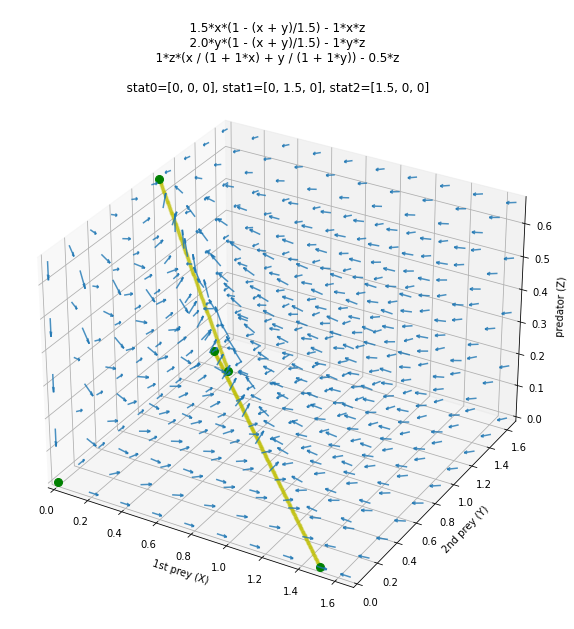

In [376]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))
fig.suptitle(title)
plotXYZquiver = fig.add_subplot(projection='3d')

sizeX = max(initX) / 3
sizeY = max(initY) / 3
sizeZ = max(initZ) / 3

Xm,Ym,Zm = np.meshgrid(
  np.linspace(0,sizeX,10),
  np.linspace(0,sizeY,10),
  np.linspace(0,sizeZ,5)
)

plotXYZquiver.quiver(Xm, Ym, Zm,
    dx(Xm,Ym,Zm), 
    dy(Xm,Ym,Zm), 
    dz(Xm,Ym,Zm), 
    length=sizeX/30, 
    normalize=True).set_alpha(0.8)

# # statSurface
# x = np.array([[statPoints[1][0], statPoints[2][0]], [statPoints[3][0], statPoints[4][0]]])
# y = np.array([[statPoints[1][1], statPoints[2][1]], [statPoints[3][1], statPoints[4][1]]])
# z = np.array([[statPoints[1][2], statPoints[2][2]], [statPoints[3][2], statPoints[4][2]]])
# plotXYZquiver.plot_surface(x,y,z, alpha=0.2, cmap='viridis')

# statLines
for line in statLines:
  plotXYZquiver.plot(*line, 'yo',  markersize=3, alpha=0.3)
  
# statPoints
for point in statPoints:
  plotXYZquiver.plot(*point, 'go', markersize=8)

plotXYZquiver.set_xlim(0, sizeX)
plotXYZquiver.set_ylim(0, sizeY)
plotXYZquiver.set_zlim(0, sizeZ)
plotXYZquiver.set_xlabel('1st prey (X)')
plotXYZquiver.set_ylabel('2nd prey (Y)')
plotXYZquiver.set_zlabel('predator (Z)')
plt.show()

3D график + направления

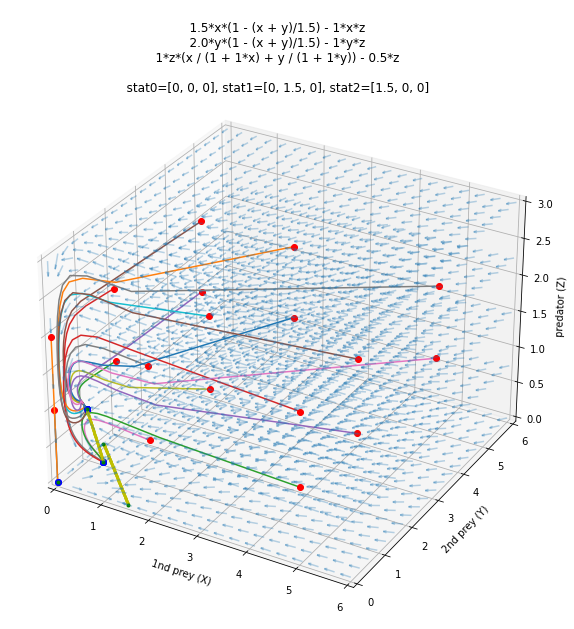

In [377]:
%matplotlib inline

sizeX = max(initX) + 1
sizeY = max(initY) + 1
sizeZ = max(initZ) + 1

fig = plt.figure(figsize=(10,10))
fig.suptitle(title)
plotXYZ = fig.add_subplot(111, projection='3d')


for X0 in initX:
    for Y0 in initY:
        for Z0 in initZ: 
            result = odeint(fun, [X0, Y0, Z0], time)
            plotXYZ.plot(result[:,0], result[:,1], result[:,2])
            plotXYZ.plot(result[0, 0], result[0, 1], result[0, 2], 'ro')
            plotXYZ.plot(result[-1, 0], result[-1, 1], result[-1, 2], 'bo')


# statLines
for line in statLines:
  plotXYZ.plot(*line, 'yo',  markersize=2, alpha=0.3)
  
# statPoints
for point in statPoints:
  plotXYZ.plot(*point, 'go', markersize=3)

# # statSurface
# x = np.array([[statPoints[1][0], statPoints[2][0]], [statPoints[3][0], statPoints[4][0]]])
# y = np.array([[statPoints[1][1], statPoints[2][1]], [statPoints[3][1], statPoints[4][1]]])
# z = np.array([[statPoints[1][2], statPoints[2][2]], [statPoints[3][2], statPoints[4][2]]])
# plotXYZ.plot_surface(x,y,z, alpha=0.2, cmap='viridis')

Xm,Ym,Zm = np.meshgrid(
  np.linspace(0,sizeX,20),
  np.linspace(0,sizeY,20),
  np.linspace(0,sizeZ,5)
)

plotXYZ.quiver(Xm, Ym, Zm,
    dx(Xm,Ym,Zm), 
    dy(Xm,Ym,Zm), 
    dz(Xm,Ym,Zm), 
    length=sizeX/30, 
    normalize=True).set_alpha(0.3)


plotXYZ.set_xlim(0, sizeX)
plotXYZ.set_ylim(0, sizeY)
plotXYZ.set_zlim(0, sizeZ)
plotXYZ.set_xlabel('1nd prey (X)')
plotXYZ.set_ylabel('2nd prey (Y)') 
plotXYZ.set_zlabel('predator (Z)')   

plt.show()

Отрисовка 2D проекций 

C:\Users\DMITRI~1.PUS\AppData\Local\Temp/ipykernel_27564/39794744.py:50: RuntimeWarning: invalid value encountered in true_divide
  dx(Xm,0,Zm)/np.sqrt(dx(Xm,0,Zm)**2+dz(Xm,0,Zm)**2),
C:\Users\DMITRI~1.PUS\AppData\Local\Temp/ipykernel_27564/39794744.py:51: RuntimeWarning: invalid value encountered in true_divide
  dz(Xm,0,Zm)/np.sqrt(dx(Xm,0,Zm)**2+dz(Xm,0,Zm)**2),
C:\Users\DMITRI~1.PUS\AppData\Local\Temp/ipykernel_27564/39794744.py:61: RuntimeWarning: invalid value encountered in true_divide
  dy(0,Ym,Zm)/np.sqrt(dy(0,Ym,Zm)**2+dz(0,Ym,Zm)**2),
C:\Users\DMITRI~1.PUS\AppData\Local\Temp/ipykernel_27564/39794744.py:62: RuntimeWarning: invalid value encountered in true_divide
  dz(0,Ym,Zm)/np.sqrt(dy(0,Ym,Zm)**2+dz(0,Ym,Zm)**2),
C:\Users\DMITRI~1.PUS\AppData\Local\Temp/ipykernel_27564/39794744.py:72: RuntimeWarning: invalid value encountered in true_divide
  dx(Xm,Ym,sliceZ)/np.sqrt(dx(Xm,Ym,sliceZ)**2+dy(Xm,Ym,sliceZ)**2),
C:\Users\DMITRI~1.PUS\AppData\Local\Temp/ipykernel_27564/39794744

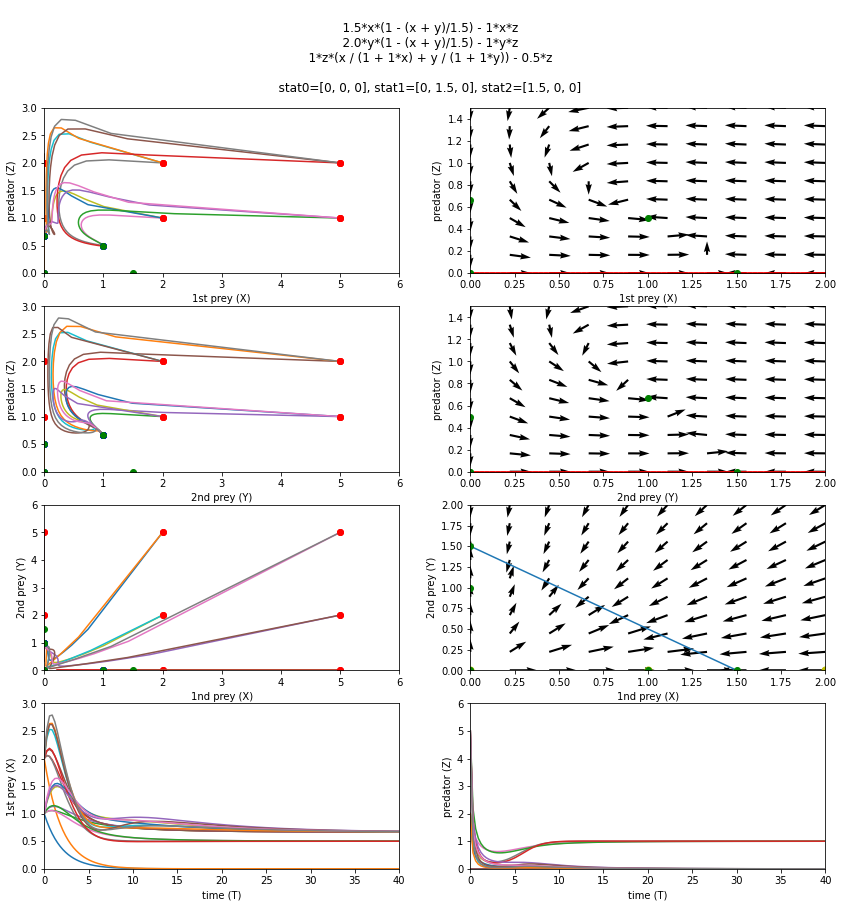

In [379]:
%matplotlib inline

sizeX = max(initX) + 1
sizeY = max(initY) + 1
sizeZ = max(initZ) + 1
sizeTime = 40
sizeXquiver = sizeX/3
sizeYquiver = sizeY/3
sizeZquiver = sizeZ/2


# slicesZ = [0,0.25,0.5,0.6,1]
sliceZ = 0

fig, (
    (plotZX, plotZXquiver), 
    (plotZY, plotZYquiver), 
    (plotYX, plotYXquiver), 
    (plotZT, plotXT)
) = plt.subplots(4, 2, figsize=(14,14))

fig.suptitle(title)

for X0 in initX:
    for Y0 in initY:
        for Z0 in initZ: 
            result = odeint(fun, [X0, Y0, Z0], time)
            
            # графики Z от X, Z от Y, Y от X
            plotZX.plot(result[:, 0], result[:,2])
            plotZX.plot(result[0, 0], result[0, 2], 'ro')
            plotZX.plot(result[-1, 0], result[-1, 2], 'bo')

            plotZY.plot(result[:, 1], result[:, 2])
            plotZY.plot(result[0, 1], result[0, 2], 'ro')
            plotZY.plot(result[-1, 1], result[-1, 2], 'bo')

            plotYX.plot(result[:, 0], result[:, 1])
            plotYX.plot(result[0, 0], result[0, 1], 'ro')
            plotYX.plot(result[-1, 0], result[-1, 1], 'bo')

            # график Z от t, график Z от Y
            plotXT.plot(time, result[:, 0])
            plotZT.plot(time, result[:, 2])

### quivers
# Z от X quiver
Xm, Zm = np.meshgrid(np.linspace(0,sizeXquiver,10), np.linspace(0,sizeZquiver,10))
plotZXquiver.quiver( Xm, Zm, 
    dx(Xm,0,Zm)/np.sqrt(dx(Xm,0,Zm)**2+dz(Xm,0,Zm)**2),
    dz(Xm,0,Zm)/np.sqrt(dx(Xm,0,Zm)**2+dz(Xm,0,Zm)**2), 
    scale_units='xy',  angles='xy')

plotZXquiver.set_xlabel('1st prey (X)')
plotZXquiver.set_ylabel('predator (Z)')    
plotZXquiver.set_xlim(0, sizeXquiver); plotZXquiver.set_ylim(0, sizeZquiver)

# Z от Y quiver
Ym, Zm = np.meshgrid(np.linspace(0,sizeYquiver,10), np.linspace(0,sizeZquiver,10))
plotZYquiver.quiver( Ym, Zm, 
    dy(0,Ym,Zm)/np.sqrt(dy(0,Ym,Zm)**2+dz(0,Ym,Zm)**2), 
    dz(0,Ym,Zm)/np.sqrt(dy(0,Ym,Zm)**2+dz(0,Ym,Zm)**2), 
    scale_units='xy',  angles='xy' )

plotZYquiver.set_xlabel('2nd prey (Y)')
plotZYquiver.set_ylabel('predator (Z)')    
plotZYquiver.set_xlim(0, sizeXquiver); plotZYquiver.set_ylim(0, sizeZquiver)

# Y от X quiver
Xm, Ym = np.meshgrid(np.linspace(0,sizeXquiver,10), np.linspace(0,sizeYquiver,10))
plotYXquiver.quiver( Xm, Ym, 
    dx(Xm,Ym,sliceZ)/np.sqrt(dx(Xm,Ym,sliceZ)**2+dy(Xm,Ym,sliceZ)**2), 
    dy(Xm,Ym,sliceZ)/np.sqrt(dx(Xm,Ym,sliceZ)**2+dy(Xm,Ym,sliceZ)**2), 
    scale_units='xy',  angles='xy')

plotYXquiver.set_xlabel('1nd prey (X)')
plotYXquiver.set_ylabel('2nd prey (Y)')  
plotYXquiver.set_xlim(0, sizeXquiver); plotYXquiver.set_ylim(0, sizeYquiver)


### slicesZ
x = np.linspace(0,sizeXquiver,1000)
y = np.linspace(0,sizeYquiver,1000)
z = [sliceZ]*len(x)
plotZXquiver.plot(x,z, 'ro',markersize=1)
plotZYquiver.plot(y,z, 'ro',markersize=1)


### statLines
if sliceZ ==0: plotYXquiver.plot(*statLine1,'yo',  markersize=7)

### statPoints
for cur_plot in [plotZX, plotZXquiver]: 
    for stat in statPoints:
        cur_plot.plot(stat[0], stat[2], 'go')
for cur_plot in [plotZY, plotZYquiver]: 
    for stat in statPoints:
        cur_plot.plot(stat[1], stat[2], 'go')
for cur_plot in [plotYX, plotYXquiver]: 
    for stat in statPoints:
        cur_plot.plot(stat[0], stat[1], 'go')


### other labels
plotZX.set_xlabel('1st prey (X)')
plotZX.set_ylabel('predator (Z)')    
plotZX.set_xlim(0, sizeX); plotZX.set_ylim(0, sizeZ)

plotZY.set_xlabel('2nd prey (Y)')
plotZY.set_ylabel('predator (Z)')    
plotZY.set_xlim(0, sizeY); plotZY.set_ylim(0, sizeZ)

plotYX.set_xlabel('1nd prey (X)')
plotYX.set_ylabel('2nd prey (Y)')  
plotYX.set_xlim(0, sizeX); plotYX.set_ylim(0, sizeY)

plotXT.set_xlabel('time (T)')
plotXT.set_ylabel('predator (Z)')    
plotXT.set_xlim(0, sizeTime); plotXT.set_ylim(0, sizeX)

plotZT.set_xlabel('time (T)')
plotZT.set_ylabel('1st prey (X)') 

plotZT.set_xlim(0, sizeTime); plotZT.set_ylim(0, sizeZ)


plt.show()


Поиск стационаров минимализацией

In [380]:

# # минимализация при x = 0
dy = lambda y,z: r2*y*(1-y/k)-b*y*z
dz = lambda y,z: r3*z*y/(1+a*y)-c*z
fun = lambda p: dy(*p)**2 + dz(*p)**2

x = 0
y = c/(r3-c*a)
z = r2*y*(1-y/k)/b/y
print(x, y, z)
print((r2/b)+r2/(b*k*(a-r3/c)))

# минимализация при y = 0
x = c/(r3-c*a)
y = 0
z = r1*x*(1-x/k)/b/x
print(x, y, z)

print(c/(r3-c*a), (a*k*c-k*r3+c)/(r3-c*a)+k)

minimize(fun, [10,10])



## минимализайия в 3D пространстве
#жертва1
dx = lambda x,y,z: r1*x*(1 - (x + y)/k) - b*x*z
#жертва2
dy = lambda x,y,z: r2*y*(1 - (x + y)/k) - b*y*z
#хищник
dz = lambda x,y,z: r3*z*(x / (1 + a*x) + y / (1 + a*y)) - c*z

fun = lambda p: dx(*p)**2 + dy(*p)**2 + dz(*p)**2

minimize(fun, [10,10,5])




Просчёт матрицы Екоби и собственных значений в точках стационаров

In [384]:
Pxx = lambda x,y,z: (r1*(k - 2*x - y)/k) - b*z
Pxy = lambda x,y,z: -r1*x/k
Pxz = lambda x,y,z: -b*x

Pyx = lambda x,y,z: -r2*y/k
Pyy = lambda x,y,z: (r2*(k - x - 2*y)/k) - b*z
Pyz = lambda x,y,z: -b*y

Pzx = lambda x,y,z: r3*z / (a*x+1)**2
Pzy = lambda x,y,z: r3*z / (a*y+1)**2
Pzz = lambda x,y,z: r3*(x/(a*x+1)+y/(a*y+1))-c

J = lambda p: np.array([
    [Pxx(*p), Pxy(*p), Pxz(*p)],
    [Pyx(*p), Pyy(*p), Pyz(*p)],
    [Pzx(*p), Pzy(*p), Pzz(*p)]
])

for i in range(len(statPoints)):
    print("Stationary", statPoints[i])
    # print("Jacobian")
    # print(J(statPoints[i]))
    w,v = eig(J(statPoints[i]))
    print("Eigenvalues", w)

    if (w[0]*w[1]*w[2] > 0):
        if (w[0]*w[1] <=0 or w[1]*w[2]<=0): 
            print("седло")
        else: 
            print("неустойчивый узел")
    else:
        if (w[0]*w[1] <=0 or w[1]*w[2]<=0):
            print('седло')
        else:
            print("устойчивый узел")

    print(" =============== \n")

Stationary [0, 0, 0]
Eigenvalues [ 1.5  2.  -0.5]
седло

Stationary [0, 1.5, 0]
Eigenvalues [-2.   0.   0.1]
седло

Stationary [1.5, 0, 0]
Eigenvalues [-1.5  0.   0.1]
седло

Stationary [0, 1.0, 0.6666666666666667]
Eigenvalues [-0.13962039 -1.19371294 -0.16666667]
устойчивый узел

Stationary [1.0, 0, 0.5]
Eigenvalues [-0.85355339 -0.14644661  0.16666667]
седло



Stationary
[0, 0, 0]
Jacobian
[[ 1.5 -0.   0. ]
 [-0.   2.   0. ]
 [ 0.   0.  -0.5]]
Eigenvalues
[ 1.5  2.  -0.5]
Stationary
[0, 1.5, 0]
Jacobian
[[ 0.  -0.   0. ]
 [-2.  -2.  -1.5]
 [ 0.   0.   0.1]]
Eigenvalues
[-2.   0.   0.1]
Stationary
[1.5, 0, 0]
Jacobian
[[-1.5 -1.5 -1.5]
 [-0.   0.   0. ]
 [ 0.   0.   0.1]]
Eigenvalues
[-1.5  0.   0.1]
Stationary
[0, 1.0, 0.6666666666666667]
Jacobian
[[-0.16666667 -0.          0.        ]
 [-1.33333333 -1.33333333 -1.        ]
 [ 0.66666667  0.16666667  0.        ]]
Eigenvalues
[-0.13962039 -1.19371294 -0.16666667]
Stationary
[1.0, 0, 0.5]
Jacobian
[[-1.         -1.         -1.        ]
 [-0.          0.16666667  0.        ]
 [ 0.125       0.5         0.        ]]
Eigenvalues
[-0.85355339 -0.14644661  0.16666667]
